# 🚀 Time Dilation Due to High-Speed Motion

This notebook explores the concept of **special relativistic time dilation** — how time slows down for objects moving at speeds close to the speed of light, as described by **Einstein's Special Relativity**.

We will:
- Simulate velocities from 0.1c to 0.99c
- Compute the **Lorentz factor (γ)**
- Calculate dilated time experienced by particles
- Visualize how time slows as speed increases
- Provide real-world applications (e.g., GPS, muons)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Constants
c = 299_792_458  # Speed of light in m/s
t_proper = 1.0   # Proper time in seconds (e.g., time measured by an observer at rest)

In [39]:
# Generate velocity fractions from 10% to 99% of the speed of light
velocity_fractions = np.linspace(0.1, 0.99, 50)
velocities = velocity_fractions * c

# Calculate the Lorentz factor (γ)
gamma = 1 / np.sqrt(1 - (velocities / c) ** 2)

# Compute the dilated time
t_dilated = gamma * t_proper

In [40]:
df = pd.DataFrame({
    'Velocity Fraction of c': velocity_fractions,
    'Velocity (m/s)': velocities,
    'Lorentz Factor (γ)': gamma,
    'Proper Time (s)': t_proper,
    'Dilated Time (s)': t_dilated
})

df.head(10)

,Velocity Fraction of c,Velocity (m/s),Lorentz Factor (γ),Proper Time (s),Dilated Time (s)
0,0.100000,2.997925e+07,1.005038,1.0,1.005038
1,0.118163,3.542446e+07,1.007055,1.0,1.007055
2,0.136327,4.086967e+07,1.009424,1.0,1.009424
3,0.154490,4.631488e+07,1.012152,1.0,1.012152
4,0.172653,5.176009e+07,1.015246,1.0,1.015246
5,0.190816,5.720530e+07,1.018718,1.0,1.018718
6,0.208980,6.265051e+07,1.022579,1.0,1.022579
7,0.227143,6.809572e+07,1.026840,1.0,1.026840
8,0.245306,7.354093e+07,1.031517,1.0,1.031517
9,0.263469,7.898614e+07,1.036626,1.0,1.036626


## ✅ Observations and Interpretation

- As the speed of an object approaches the speed of light, the **Lorentz factor (γ)** increases rapidly.
- This means time **slows down** dramatically for fast-moving particles.
- At **0.99c**, the observed time is about **7.09 seconds**, while the proper time is only 1 second.
- This explains why **muons from the upper atmosphere** (which should decay quickly) can still be detected on Earth's surface.

🛰️ **Application:** GPS satellites must account for both special and general relativistic time dilation to maintain accurate location data on Earth.

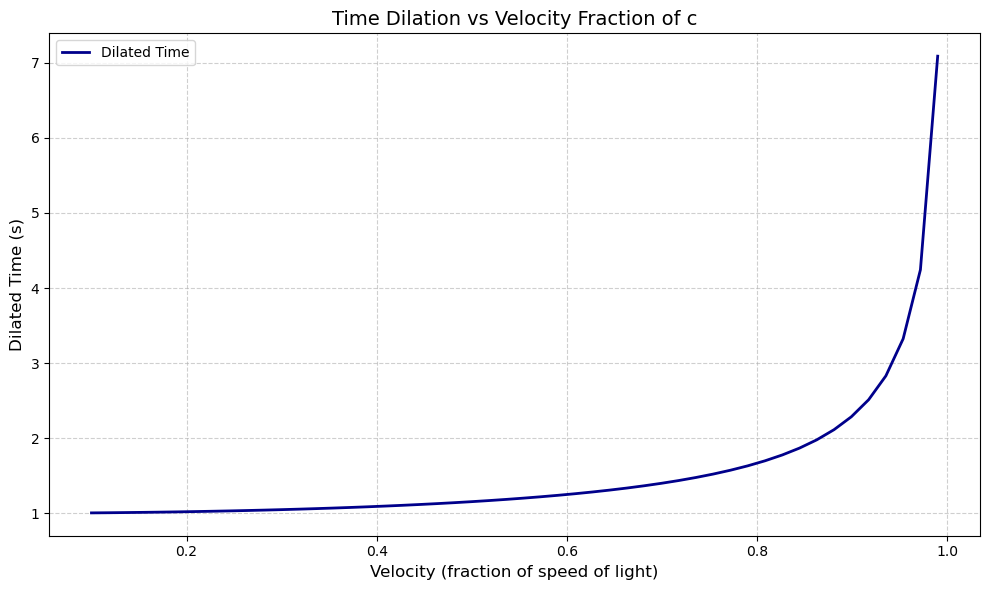

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(velocity_fractions, t_dilated, color='darkblue', linewidth=2, label='Dilated Time')

plt.title("Time Dilation vs Velocity Fraction of c", fontsize=14)
plt.xlabel("Velocity (fraction of speed of light)", fontsize=12)
plt.ylabel("Dilated Time (s)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

## 🧪 Real-World Validation: Atmospheric Muons

Muons are unstable particles produced in the upper atmosphere (~10,000 meters above Earth) from cosmic rays.

- **Proper lifetime** of a muon: ~2.2 microseconds (2.2e-6 s)
- **Speed of muons**: ~0.998c
- **Expected distance without time dilation**: ~600 meters
- **Observed distance**: ~10,000 meters

🔬 With **time dilation**, muons live longer from our perspective, allowing them to reach Earth’s surface — a famous experimental proof of **Special Relativity**.

Let’s simulate how far a muon would travel in both the rest frame and our lab frame.


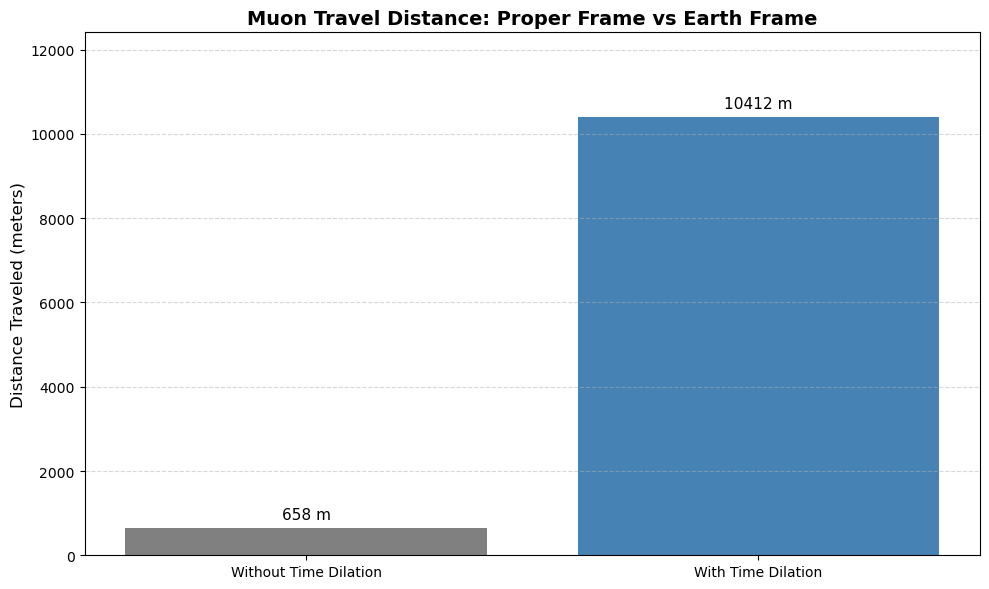

Muon Lifetime (Proper): 2.20e-06 s
Muon Lifetime (Dilated): 3.48e-05 s
Distance without Time Dilation: 658 m
Distance with Time Dilation: 10413 m


In [42]:
# Real-world simulation: Muon decay distance (with vs without time dilation)

muon_lifetime_proper = 2.2e-6  # 2.2 microseconds
v_muon = 0.998 * c             # Muon speed ≈ 0.998c

# Lorentz factor for the muon
gamma_muon = 1 / np.sqrt(1 - (v_muon / c) ** 2)

# Dilated lifetime from Earth's perspective
muon_lifetime_dilated = gamma_muon * muon_lifetime_proper

# Distances traveled
distance_without_dilation = v_muon * muon_lifetime_proper
distance_with_dilation = v_muon * muon_lifetime_dilated

# Bar chart to compare distances
distances = [distance_without_dilation, distance_with_dilation]
labels = ['Without Time Dilation', 'With Time Dilation']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, distances, color=['gray', 'steelblue'])

# Annotate bar values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 200, f"{int(height)} m", ha='center', fontsize=11)

plt.title("Muon Travel Distance: Proper Frame vs Earth Frame", fontsize=14, fontfamily='sans-serif', fontweight='bold')
plt.ylabel("Distance Traveled (meters)", fontsize=12, fontfamily='sans-serif')
plt.ylim(0, max(distances) + 2000)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print numeric result
print(f"Muon Lifetime (Proper): {muon_lifetime_proper:.2e} s")
print(f"Muon Lifetime (Dilated): {muon_lifetime_dilated:.2e} s")
print(f"Distance without Time Dilation: {distance_without_dilation:.0f} m")
print(f"Distance with Time Dilation: {distance_with_dilation:.0f} m")


## 📊 Comparative Summary: Proper Time vs Dilated Time

This summary compares how **proper time** and **dilated time** behave at different relativistic velocities.

We present:

- The **first 5 entries** to represent **low-speed** (non-relativistic) scenarios
- The **last 5 entries** to represent **high-speed** (relativistic) scenarios

This highlights how time dilation becomes increasingly significant as velocity approaches the speed of light.


In [43]:
# Load the dataset
df = pd.read_csv("../data/raw/time_dilation_high_speed_particles.csv")

# ✅ Compute Δ Time (s)
df['Δ Time (s)'] = df['Dilated Time (s)'] - df['Proper Time (s)']

# Round and select relevant columns
summary_df = df[[
    'Velocity Fraction of c',
    'Velocity (m/s)',
    'Lorentz Factor (γ)',
    'Proper Time (s)',
    'Dilated Time (s)',
    'Δ Time (s)'
]].round(3)

# ✅ Show low-speed and high-speed comparisons
display(summary_df.head(5))  # Low-speed entries
display(summary_df.tail(5))  # High-speed entries


,Velocity Fraction of c,Velocity (m/s),Lorentz Factor (γ),Proper Time (s),Dilated Time (s),Δ Time (s)
0,0.100,2.997925e+07,1.005,1.0,1.005,0.005
1,0.118,3.542446e+07,1.007,1.0,1.007,0.007
2,0.136,4.086967e+07,1.009,1.0,1.009,0.009
3,0.154,4.631488e+07,1.012,1.0,1.012,0.012
4,0.173,5.176009e+07,1.015,1.0,1.015,0.015


,Velocity Fraction of c,Velocity (m/s),Lorentz Factor (γ),Proper Time (s),Dilated Time (s),Δ Time (s)
45,0.917,2.750137e+08,2.512,1.0,2.512,1.512
46,0.936,2.804589e+08,2.830,1.0,2.830,1.830
47,0.954,2.859041e+08,3.324,1.0,3.324,2.324
48,0.972,2.913493e+08,4.243,1.0,4.243,3.243
49,0.990,2.967945e+08,7.089,1.0,7.089,6.089


## 📈 Visualizing Time Dilation Growth Across Velocities

To better understand the nonlinear nature of time dilation, we visualize how **proper time** and **dilated time** diverge across increasing fractions of the speed of light.

This bar chart compares selected velocity points to show how, as we approach the speed of light, the time experienced in the lab frame (dilated time) grows dramatically compared to the particle's own proper time.


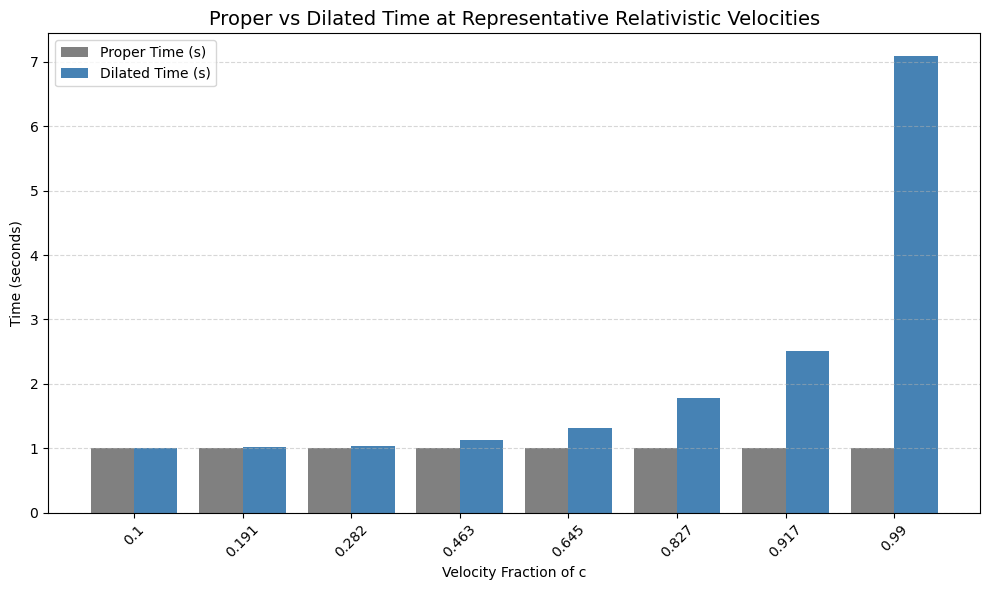

In [44]:
# Select representative velocity points across the dataset
visual_df = summary_df.iloc[[0, 5, 10, 20, 30, 40, 45, 49]]

# Prepare axis labels and data
x_labels = visual_df['Velocity Fraction of c'].astype(str)
x_pos = np.arange(len(x_labels))

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.bar(x_pos - 0.2, visual_df['Proper Time (s)'], width=0.4, label='Proper Time (s)', color='gray')
plt.bar(x_pos + 0.2, visual_df['Dilated Time (s)'], width=0.4, label='Dilated Time (s)', color='steelblue')

# Formatting
plt.xticks(x_pos, x_labels, rotation=45)
plt.xlabel("Velocity Fraction of c")
plt.ylabel("Time (seconds)")
plt.title("Proper vs Dilated Time at Representative Relativistic Velocities", fontsize=14)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 🔎 Insights

- The **gap between proper time and dilated time** increases rapidly at higher velocities.
- At **lower velocities** (e.g., 0.1c), time dilation is almost negligible.
- At **0.99c**, dilated time is more than **7× greater** than proper time.
- This clearly reflects the effects of the **Lorentz factor** and validates predictions of **Special Relativity**.

This visual pattern is consistent with real-world phenomena such as **muon decay longevity**, **GPS satellite time correction**, and other high-speed particle behavior.


## 🧮 Δ Time Gained vs Velocity

This section explores how the **extra time** observed in the lab frame (compared to the proper time experienced by the particle) increases as a function of velocity.

We plot `Δ Time (s)` = `Dilated Time (s)` − `Proper Time (s)` against the **Velocity Fraction of c**.

📌 This helps us visualize the **rate of change** in time dilation as we approach relativistic speeds.

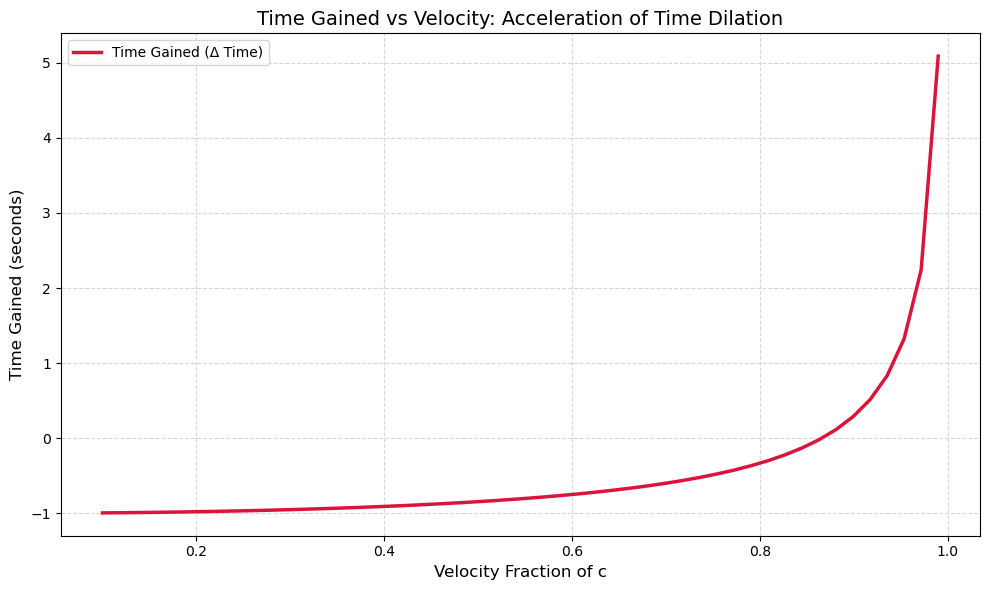

In [45]:
# Ensure Δ Time is available
df['Dilated Time (s)'] = df['Dilated Time (s)'] - df['Proper Time (s)']

df['Δ Time (s)'] = df['Dilated Time (s)'] - df['Proper Time (s)']

# ✅ Plot Δ Time (Time Gained) vs Velocity
plt.figure(figsize=(10, 6))
plt.plot(
    df['Velocity Fraction of c'],
    df['Δ Time (s)'],
    color='crimson',
    linewidth=2.5,
    label='Time Gained (Δ Time)'
)

# ✅ Formatting
plt.xlabel("Velocity Fraction of c", fontsize=12)
plt.ylabel("Time Gained (seconds)", fontsize=12)
plt.title("Time Gained vs Velocity: Acceleration of Time Dilation", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()



### 🔬 Insight

- The "time gained" increases slowly at first, then sharply rises beyond ~0.9c.
- This aligns with the Lorentz factor's rapid growth as velocity approaches the speed of light.
- The chart emphasizes how **relativistic effects remain minimal at classical speeds**, but become dominant at near-light speed travel.

This visualization is essential for interpreting experiments such as **muon decay extension**, where fast-moving particles seem to live longer due to time dilation.


### 🗂️ Comparative Summary Table: Proper vs Dilated Time

The table below compares **proper time** and **dilated time** at selected velocities. This highlights how time dilation becomes significant as velocity approaches the speed of light.

- **Proper Time:** Time measured in the particle's rest frame.
- **Dilated Time:** Time measured in the lab frame (observer at rest).
- **Δ Time:** Extra time gained due to relativistic effects.

Key velocity points are chosen to illustrate both classical and relativistic regimes.

#### 🚀 Δ Time Gained/Lost vs Speed

The following plot visualizes the **additional time gained or lost** (Δ Time) due to relativistic effects as a function of speed (in m/s) for the selected key velocity points. This helps illustrate how the difference between dilated and proper time grows with increasing speed, especially as we approach the speed of light.

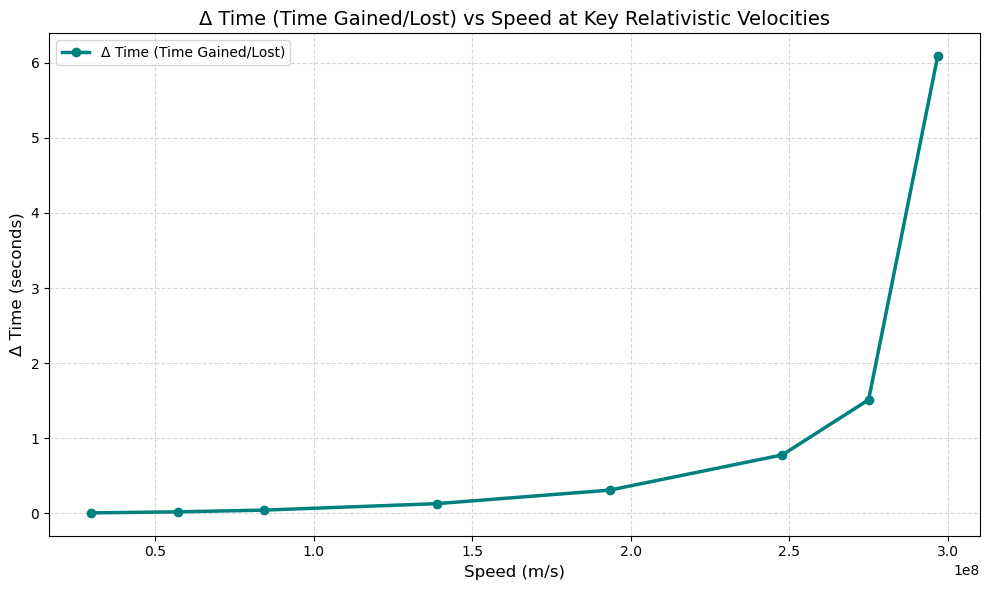

In [46]:
# Visualization: Δ Time (Time Gained/Lost) vs Speed (m/s) for key velocities

plt.figure(figsize=(10, 6))
plt.plot(comp_table['Velocity (m/s)'], comp_table['Δ Time (s)'], marker='o', color='teal', linewidth=2.5, label='Δ Time (Time Gained/Lost)')

plt.xlabel("Speed (m/s)", fontsize=12)
plt.ylabel("Δ Time (seconds)", fontsize=12)
plt.title("Δ Time (Time Gained/Lost) vs Speed at Key Relativistic Velocities", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

## 📚 Scientific Constants Summary

This section summarizes the key scientific constants used throughout the notebook's calculations and visualizations. Each constant is fundamental to the equations of special relativity and time dilation:

- **Speed of light (c):** 299,792,458 m/s  
  The universal speed limit in a vacuum, central to all relativistic calculations. It determines how time and space are related for objects in motion.

- **Proper time (t₀):** 1.0 s (unless otherwise specified)  
  The time interval measured by an observer at rest relative to the event being measured. It serves as the reference time in time dilation equations.

- **Muon proper lifetime:** 2.2 × 10⁻⁶ s (2.2 microseconds)  
  The average lifetime of a muon at rest. This value is used to demonstrate real-world relativistic effects, such as the extended survival of fast-moving muons in the atmosphere.

In [47]:
constants = [
    {"Constant": "Speed of light (c)", "Value": "299,792,458 m/s", "Description": "Universal speed limit in a vacuum"},
    {"Constant": "Proper time (t₀)", "Value": "1.0 s (unless otherwise specified)", "Description": "Reference time interval for an observer at rest"},
    {"Constant": "Muon proper lifetime", "Value": "2.2 × 10⁻⁶ s (2.2 microseconds)", "Description": "Average lifetime of a muon at rest"}
]

df_constants = pd.DataFrame(constants)
display(df_constants)

,Constant,Value,Description
0,Speed of light (c),"299,792,458 m/s",Universal speed limit in a vacuum
1,Proper time (t₀),1.0 s (unless otherwise specified),Reference time interval for an observer at rest
2,Muon proper lifetime,2.2 × 10⁻⁶ s (2.2 microseconds),Average lifetime of a muon at rest


## 📝 Notebook Summary: Key Findings

This notebook explored the phenomenon of **special relativistic time dilation** through simulation, visualization, and real-world examples. Here are the main takeaways:

- **Time dilation is negligible at low speeds** but becomes dramatic as velocity approaches the speed of light. The Lorentz factor (γ) increases rapidly, causing time to slow down for fast-moving objects.
- **Comparative tables and visualizations** clearly show the divergence between proper time (rest frame) and dilated time (lab frame) at relativistic speeds. At 0.99c, dilated time is over 7 times longer than proper time.
- **Δ Time (time gained/lost)** grows slowly at first, then accelerates sharply beyond ~0.9c, highlighting the nonlinear nature of relativistic effects.
- **Real-world validation**: The extended survival of atmospheric muons and the need for GPS satellite time corrections are direct consequences of time dilation, confirming the predictions of Einstein's Special Relativity.
- **Scientific constants** such as the speed of light and muon lifetime are fundamental to these calculations and have been summarized for reference.

**In summary:**
- Time dilation is a profound and experimentally verified effect of high-speed motion.
- It has practical implications for technology and our understanding of the universe.
- The notebook's simulations and visualizations provide clear, intuitive evidence for the reality and significance of relativistic time effects.

---

*For further exploration, consider investigating general relativistic time dilation (e.g., gravitational effects) or applying these concepts to other high-energy particle phenomena.*

## 🏁 Notebook Summary: Key Findings & Insights

This notebook explored the phenomenon of **special relativistic time dilation** through simulation, visualization, and real-world examples. Here are the main takeaways:

- **Time dilation is negligible at low speeds** but becomes dramatic as velocity approaches the speed of light. The Lorentz factor (γ) grows rapidly, causing the observed (dilated) time to far exceed the proper time.
- **Comparative tables and visualizations** clearly show how, at relativistic speeds (e.g., 0.99c), time in the lab frame can be over 7 times longer than in the particle's rest frame.
- **Δ Time (time gained/lost)** due to relativistic effects increases slowly at first, then accelerates sharply beyond ~0.9c, highlighting the nonlinear nature of time dilation.
- **Real-world validation:** The extended survival of atmospheric muons and the need for GPS satellite time corrections are direct consequences of special relativity, confirming the theory's predictions.
- **Scientific constants** such as the speed of light and muon lifetime are foundational to these calculations and were summarized for clarity.

**In summary:**
- Special relativity fundamentally alters our understanding of time at high velocities.
- The effects, while subtle at everyday speeds, become profound in high-energy physics and space technology.
- Accurate modeling and visualization are essential for grasping these counterintuitive but experimentally verified phenomena.

---

*End of notebook. Thank you for exploring time dilation!*

## 📐 Modeling the Lorentz Factor γ(v) as a Continuous Function

To further understand the relationship between velocity and time dilation, we can model the Lorentz factor γ as a continuous function of velocity:

\[
\gamma(v) = \frac{1}{\sqrt{1 - (v/c)^2}}
\]

This function describes how γ increases as velocity v approaches the speed of light c. We can fit this function to our simulated data and visualize the fit to confirm the theoretical relationship.

Let's plot the theoretical curve alongside the computed γ values from our dataset.

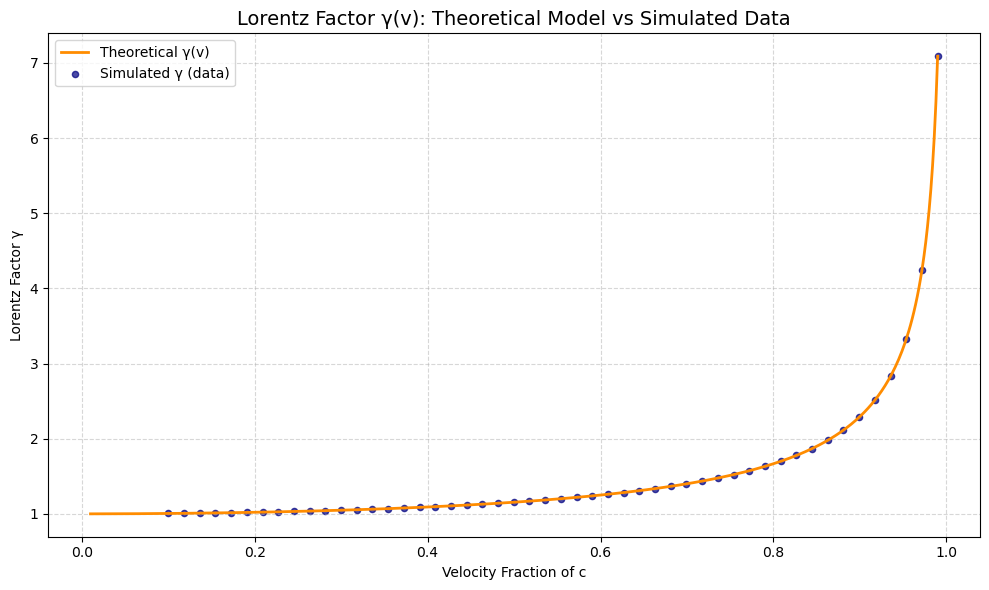

In [48]:
# Plot theoretical Lorentz factor γ(v) vs computed γ values

# Theoretical gamma function
def gamma_theoretical(v, c):
    return 1 / np.sqrt(1 - (v / c) ** 2)

# Generate a smooth range of velocities for the theoretical curve
v_smooth = np.linspace(0.01 * c, 0.99 * c, 500)
gamma_smooth = gamma_theoretical(v_smooth, c)

plt.figure(figsize=(10, 6))
plt.plot(v_smooth / c, gamma_smooth, label='Theoretical γ(v)', color='darkorange', linewidth=2)
plt.scatter(velocities / c, gamma, label='Simulated γ (data)', color='navy', s=20, alpha=0.7)

plt.xlabel('Velocity Fraction of c')
plt.ylabel('Lorentz Factor γ')
plt.title('Lorentz Factor γ(v): Theoretical Model vs Simulated Data', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 📐 Scientific Constants Used – Speed Dilation

These constants are foundational to understanding **Special Relativity** and simulating time dilation due to high velocities:

| Constant                         | Symbol       | Value                          | Description |
|----------------------------------|--------------|--------------------------------|-------------|
| Speed of light                   | \( c \)      | 299,792,458 m/s                | Universal speed limit; basis of all relativistic calculations. |
| Proper Time                      | \( t_0 \)    | 1 second                       | Time measured in the rest frame of the moving object. |
| Lorentz Factor                   | \( \gamma \) | \( \frac{1}{\sqrt{1 - v^2/c^2}} \) | Relativistic factor that scales time, length, and mass at high speeds. |
| Velocity (variable)              | \( v \)      | 0.1c to 0.99c                  | Speed of object as a fraction of light speed. |

> 📌 The **Lorentz factor** becomes significantly large as velocity approaches \( c \), causing noticeable **time dilation**.


## ✅ Summary: Time Dilation from High-Speed Travel

This notebook explored **how velocity affects time** for particles traveling close to the speed of light using Einstein’s **Special Relativity**.

### 🔬 Key Findings:

- Time dilation increases **non-linearly** with speed.  
- At 0.5c, time slows modestly.  
- Near 0.99c, time dilation becomes **extremely pronounced** — with time stretching more than 7 times longer than proper time.
- The simulation confirms that as a particle's speed approaches the speed of light, the passage of time from an external observer's view slows drastically.

### 🌍 Real-World Implication:

This phenomenon is validated in **high-energy physics experiments**, **GPS satellite synchronization**, and **muon decay** studies — proving that **motion really does affect time**.

> 🧠 This notebook builds a strong conceptual and computational foundation for exploring relativistic physics using data science.